In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
import utils

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train, x_val = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
utils.reset_session()

In [4]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

optimizer = keras.optimizers.SGD(lr=1.5)

autoencoder.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer,
    metrics=[rounded_accuracy]
)

history = autoencoder.fit(
    x_train, x_train, 
    epochs=20,
    validation_data=(x_val, x_val)
)

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3381 - rounded_accuracy: 0.8870 - val_loss: 0.3173 - val_rounded_accuracy: 0.8989
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3056 - rounded_accuracy: 0.9151 - val_loss: 0.3020 - val_rounded_accuracy: 0.9199
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2986 - rounded_accuracy: 0.9215 - val_loss: 0.2986 - val_rounded_accuracy: 0.9197
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2948 - rounded_accuracy: 0.9249 - val_loss: 0.2938 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2923 - rounded_accuracy: 0.9272 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2904 - rounded_accuracy: 0.9289 - val_loss: 0.2914 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

In [5]:
num_images = 5
images = x_val[:num_images]
reconstructions = autoencoder.predict(images)
print(f"reconstructions.shape = {reconstructions.shape}")

reconstructions.shape = (5, 28, 28)


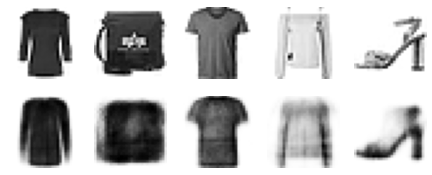

In [6]:
plt.figure(figsize=(num_images * 1.5, 3))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(images[i], cmap="binary")
    plt.axis('off')
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(reconstructions[i], cmap="binary")
    plt.axis('off')
plt.show()

In [7]:
x_val_encoded = encoder.predict(x_val)
tsne = TSNE()
x_val_2d = tsne.fit_transform(x_val_encoded)
x_val_2d = (x_val_2d - x_val_2d.min()) / (x_val_2d.max() - x_val_2d.min())

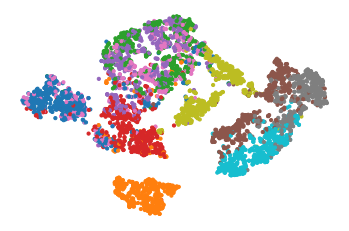

In [8]:
plt.figure()
plt.scatter(x_val_2d[:, 0], x_val_2d[:, 1], c=y_val, s=10, cmap='tab10')
plt.axis("off")
plt.show()